<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Python Notebook for Stock Market Analysis

- [API Reference]()
- [Reference]()

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

### Table of Contents <a class="anchor" id="PSMA_toc"></a>

* [Table of Contents](#PSMA_toc)
    * [1. Abstract](#PSMA_page_1)
    * [2. Imported Libraries](#PSMA_page_2)
    * [3. Import the Dataset](#PSMA_page_3)
    * [4. Setting Notebook Options](#PSMA_page_4)
    * [5. Looking at the Data](#PSMA_page_5)
    * [6. Checking the Column Names](#PSMA_page_6)
    * [7. Cleaning the Column Names](#PSMA_page_7)
    * [8. Creating a new Cleaned Dataset](#PSMA_page_8)
    * [9. Counting Columns](#PSMA_page_9)
    * [10. Get Info about the Dataset](#PSMA_page_10)
    * [11. Get Descriptive Statistics about the Dataset](#PSMA_page_11)
    * [12. Counting Rows and Removing any NANs](#PSMA_page_12)
    * [13. Correlation Analysis](#PSMA_page_13)
    * [14. Principal Component Analysis (PCA)](#PSMA_page_14)
    * [15. Group Comparison](#PSMA_page_15)
    * [16. Fisher's Discriminant Analysis and Support Vector Machines (SVM)](#PSMA_page_16)
    * [17. Groupby Function](#PSMA_page_17)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 1 - Abstract <a class="anchor" id="PSMA_page_1"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [96]:
print("jorge")
df = pd.read_clipboard()
df.to_csv("path.fileName.csv")
df.head()
CD = pd.read_csv ("path.fileName.csv")
CD.head()

jorge


,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"Jun 16, 2023","1,309.45","1,310.06","1,297.96","1,298.65","1,298.65","610,126,300"
1,1,"Jun 15, 2023","1,281.80","1,305.70","1,278.47","1,301.04","1,301.04","494,538,800"
2,2,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400"
3,3,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200"
4,4,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300"


In [94]:
 CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1259 non-null   int64 
 1   Date         1259 non-null   object
 2   Open         1258 non-null   object
 3   High         1258 non-null   object
 4   Low          1258 non-null   object
 5   Close*       1258 non-null   object
 6   Adj Close**  1258 non-null   object
 7   Volume       1258 non-null   object
dtypes: int64(1), object(7)
memory usage: 78.8+ KB


In [100]:
CD = CD.drop(CD.index[-1])

In [101]:
 CD.to_csv("../Data/CD_JV.csv")

In [102]:
df = pd.read_clipboard()
df.to_csv('path.fileName.csv')
df.head()
Healthcare = pd.read_csv ("path.fileName.csv")
Healthcare.head()

,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"Jun 16, 2023","1,536.36","1,548.07","1,534.73","1,536.25","1,536.25","375,518,800"
1,1,"Jun 15, 2023","1,512.91","1,538.34","1,512.91","1,536.36","1,536.36","189,457,500"
2,2,"Jun 14, 2023","1,530.05","1,530.05","1,507.72","1,512.91","1,512.91","227,372,400"
3,3,"Jun 13, 2023","1,522.00","1,532.23","1,518.94","1,530.05","1,530.05","177,858,200"
4,4,"Jun 12, 2023","1,515.05","1,522.57","1,510.34","1,522.00","1,522.00","167,351,500"


In [103]:
Healthcare.to_csv("../Data/HC_JV.csv")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 2 - Imported Libraries<a class="anchor" id="PSMA_page_2"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100) 
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 3 - Import The Dataset<a class="anchor" id="PSMA_page_3"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [51]:
Financials = pd.read_csv("../Data/Financials2_JV.csv")

In [87]:
Healthcare = pd.read_csv("../Data/Healthcare_JV.csv")

In [53]:
IT = pd.read_csv("../Data/IT(1)_JV.csv")

In [98]:
CD = pd.read_csv ("../Data/CD_JV.csv")

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 4 - Setting Notebook Options<a class="anchor" id="PSMA_page_4"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 5 - Looking at the data<a class="anchor" id="PSMA_page_4"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [55]:
Financials.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,69.629997,70.099998,69.330002,70.059998,62.412540,409300
1,2018-06-19,69.379997,70.099998,69.279999,69.940002,62.305649,438000
2,2018-06-20,70.360001,70.449997,69.779999,69.830002,62.207642,427600
3,2018-06-21,69.599998,69.980003,69.150002,69.620003,62.020561,1670900
4,2018-06-22,70.000000,70.099998,69.230003,69.250000,61.690964,300500


In [88]:
Healthcare.head()

,Date,Open,High,Low,Close
0,6/16/2023,"1,536.36","1,536.25","1,536.25","1,536.25"
1,6/15/2023,"1,512.91","1,536.36","1,536.36","1,536.36"
2,6/14/2023,"1,530.05","1,512.91","1,512.91","1,512.91"
3,6/13/2023,"1,522.00","1,530.05","1,530.05","1,530.05"
4,6/12/2023,"1,515.05","1,522.00","1,522.00","1,522.00"


In [57]:
IT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,137.679993,138.250000,136.699997,137.759995,137.759995,361400
1,2018-06-19,136.720001,137.789993,135.910004,137.199997,137.199997,539800
2,2018-06-20,137.320007,137.699997,136.039993,136.520004,136.520004,522400
3,2018-06-21,136.660004,137.229996,135.380005,135.820007,135.820007,318700
4,2018-06-22,136.080002,137.419998,134.639999,134.960007,134.960007,1090500


In [99]:
CD.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,0,"Jun 16, 2023","1,309.45","1,310.06","1,297.96","1,298.65","1,298.65","610,126,300"
1,1,1,"Jun 15, 2023","1,281.80","1,305.70","1,278.47","1,301.04","1,301.04","494,538,800"
2,2,2,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400"
3,3,3,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200"
4,4,4,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300"


 <hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 6 Checking the columns<a class="anchor" id="PSMA_page_6"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">


In [59]:
Financials['Close']

0       70.059998
1       69.940002
2       69.830002
3       69.620003
4       69.250000
          ...    
1253    80.239998
1254    80.169998
1255    80.800003
1256    80.470001
1257    81.489998
Name: Close, Length: 1258, dtype: float64

In [89]:
Healthcare['Close']

0      1,536.25
1      1,536.36
2      1,512.91
3      1,530.05
4      1,522.00
         ...   
247    1,482.55
248    1,450.41
249    1,430.06
250    1,393.22
251    1,392.94
Name: Close, Length: 252, dtype: object

In [61]:
IT['Close']

0       137.759995
1       137.199997
2       136.520004
3       135.820007
4       134.960007
           ...    
1253    344.549988
1254    352.339996
1255    354.850006
1256    352.369995
1257    356.190002
Name: Close, Length: 1258, dtype: float64

In [62]:
CD['Close*']

0       1,298.65
1       1,301.04
2       1,292.23
3       1,293.65
4       1,280.79
          ...   
1253      867.52
1254      886.81
1255      888.02
1256      894.32
1257      890.09
Name: Close*, Length: 1258, dtype: object

In [63]:
Financials.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,76.234364,76.833434,75.604722,76.229332,72.417494,7.188461e+05
std,12.555028,12.573115,12.517464,12.550315,13.510008,6.097608e+05
min,44.919998,45.110001,42.340000,42.799999,39.959423,1.268000e+05
25%,67.092496,67.562498,66.594997,67.145000,60.969826,3.675750e+05
50%,75.705002,76.430000,75.059998,75.805000,70.951427,5.214500e+05
75%,86.607500,87.237499,85.877499,86.577501,84.680679,8.276250e+05
max,102.000000,102.519997,101.250000,101.750000,98.829102,5.702300e+06


In [90]:
Healthcare.describe()

,Date,Open,High,Low,Close
count,252,252,252,252,252
unique,252,250,250,250,250
top,6/16/2023,"1,523.11","1,523.11","1,523.11","1,523.11"
freq,1,2,2,2,2


In [65]:
IT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,209.420469,211.959825,206.925501,209.513951,209.513951,5.425110e+05
std,79.924302,80.944189,78.958109,79.968900,79.968900,3.315900e+05
min,83.000000,85.989998,76.910004,83.239998,83.239998,1.360000e+05
25%,142.105007,143.590000,140.702499,142.269997,142.269997,3.560250e+05
50%,161.444999,162.774994,160.269996,161.520004,161.520004,4.530500e+05
75%,294.812493,299.119995,290.737495,295.407509,295.407509,6.185750e+05
max,362.820007,369.000000,353.079987,356.269989,356.269989,3.795700e+06


In [66]:
CD.describe()

,Unnamed: 0.1,Unnamed: 0
count,1258.000000,1258.000000
mean,628.500000,628.500000
std,363.297628,363.297628
min,0.000000,0.000000
25%,314.250000,314.250000
50%,628.500000,628.500000
75%,942.750000,942.750000
max,1257.000000,1257.000000


 <hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 7 Cleaning the columns<a class="anchor" id="PSMA_page_7"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

Financials['Date1'] = pd.to_datetime(Financials.Date)
Healthcare['Date1'] = pd.to_datetime(Healthcare.Date)
IT['Date1'] = pd.to_datetime(IT.Date)
CD['Date1'] = pd.to_datetime(CD.Date)

In [21]:
# Page 8 Creating a new clean dataset

In [67]:
Financials

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,69.629997,70.099998,69.330002,70.059998,62.412540,409300
1,2018-06-19,69.379997,70.099998,69.279999,69.940002,62.305649,438000
2,2018-06-20,70.360001,70.449997,69.779999,69.830002,62.207642,427600
3,2018-06-21,69.599998,69.980003,69.150002,69.620003,62.020561,1670900
4,2018-06-22,70.000000,70.099998,69.230003,69.250000,61.690964,300500
...,...,...,...,...,...,...,...
1253,2023-06-09,80.180000,80.629997,80.080002,80.239998,80.239998,282600
1254,2023-06-12,80.239998,80.629997,79.639999,80.169998,80.169998,237200
1255,2023-06-13,80.250000,81.139999,80.139999,80.800003,80.800003,268000
1256,2023-06-14,81.000000,81.410004,80.169998,80.470001,80.470001,4293800


In [68]:
Healthcare

,Date,Open,High,Low,Close
0,6/16/2023,"1,536.36","1,536.25","1,536.25","1,536.25"
1,6/15/2023,"1,512.91","1,536.36","1,536.36","1,536.36"
2,6/14/2023,"1,530.05","1,512.91","1,512.91","1,512.91"
3,6/13/2023,"1,522.00","1,530.05","1,530.05","1,530.05"
4,6/12/2023,"1,515.05","1,522.00","1,522.00","1,522.00"
...,...,...,...,...,...
247,6/23/2022,"1,450.41","1,482.55","1,482.55","1,482.55"
248,6/22/2022,"1,430.06","1,450.41","1,450.41","1,450.41"
249,6/21/2022,"1,393.22","1,430.06","1,430.06","1,430.06"
250,6/17/2022,"1,392.94","1,393.22","1,393.22","1,393.22"


In [69]:
Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    252 non-null    object
 1   Open    252 non-null    object
 2   High    252 non-null    object
 3   Low     252 non-null    object
 4   Close   252 non-null    object
dtypes: object(5)
memory usage: 10.0+ KB


In [24]:
IT

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,137.679993,138.250000,136.699997,137.759995,137.759995,361400
1,2018-06-19,136.720001,137.789993,135.910004,137.199997,137.199997,539800
2,2018-06-20,137.320007,137.699997,136.039993,136.520004,136.520004,522400
3,2018-06-21,136.660004,137.229996,135.380005,135.820007,135.820007,318700
4,2018-06-22,136.080002,137.419998,134.639999,134.960007,134.960007,1090500
...,...,...,...,...,...,...,...
1253,2023-06-09,344.750000,348.290009,343.429993,344.549988,344.549988,458000
1254,2023-06-12,347.269989,353.779999,345.859985,352.339996,352.339996,414500
1255,2023-06-13,353.799988,357.489990,353.079987,354.850006,354.850006,518800
1256,2023-06-14,353.799988,357.440002,349.970001,352.369995,352.369995,472700


In [25]:
CD1=CD.drop(["Unnamed: 0"],axis=1)

In [26]:
CD1

,Unnamed: 0.1,Date,Open,High,Low,Close*,Adj Close**,Volume
0,0,"Jun 16, 2023","1,309.45","1,310.06","1,297.96","1,298.65","1,298.65","610,126,300"
1,1,"Jun 15, 2023","1,281.80","1,305.70","1,278.47","1,301.04","1,301.04","494,538,800"
2,2,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400"
3,3,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200"
4,4,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300"
...,...,...,...,...,...,...,...,...
1253,1253,"Jun 25, 2018",881.99,882.23,862.38,867.52,867.52,-
1254,1254,"Jun 22, 2018",892.64,893.14,886.10,886.81,886.81,-
1255,1255,"Jun 21, 2018",895.70,896.44,886.67,888.02,888.02,-
1256,1256,"Jun 20, 2018",895.18,897.11,891.43,894.32,894.32,-


In [27]:
CD1['Date1'] = pd.to_datetime(CD1.Date)

In [28]:
CD1.head()

,Unnamed: 0.1,Date,Open,High,Low,Close*,Adj Close**,Volume,Date1
0,0,"Jun 16, 2023","1,309.45","1,310.06","1,297.96","1,298.65","1,298.65","610,126,300",2023-06-16
1,1,"Jun 15, 2023","1,281.80","1,305.70","1,278.47","1,301.04","1,301.04","494,538,800",2023-06-15
2,2,"Jun 14, 2023","1,295.86","1,299.41","1,275.46","1,292.23","1,292.23","508,152,400",2023-06-14
3,3,"Jun 13, 2023","1,292.28","1,294.55","1,280.39","1,293.65","1,293.65","494,163,200",2023-06-13
4,4,"Jun 12, 2023","1,267.53","1,282.99","1,263.15","1,280.79","1,280.79","535,114,300",2023-06-12


<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

# Page 8 Visualiszation<a class="anchor" id="PSMA_page_6"></a>

[Back to Top](#PSMA_toc)

<hr style="height:5px;border-width:0;color:MediumAquamarine;background-color:MediumAquamarine">

In [32]:
type(Financials)

pandas.core.frame.DataFrame

In [33]:
Financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [34]:
Financials.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

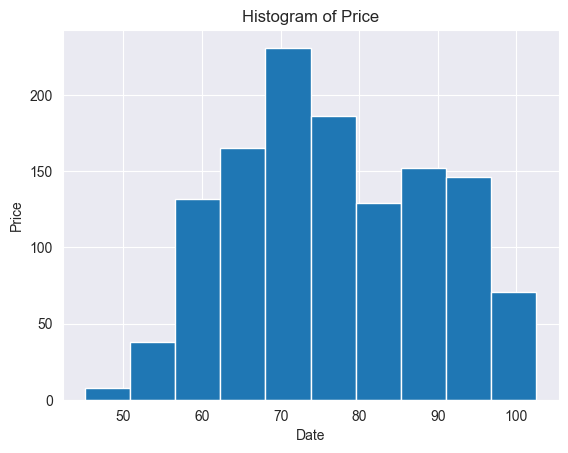

In [35]:
Financials['High'].hist()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Histogram of Price')
plt.show()

In [36]:
stats.ttest_rel(Financials['High'], Financials['Close']) 

TtestResult(statistic=35.161250680113625, pvalue=3.6483991694945176e-189, df=1257)

In [37]:
Financials['High'].corr(Financials['Close'])

0.9988250043257146

In [38]:
Financials.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,69.629997,70.099998,69.330002,70.059998,62.412540,409300
1,2018-06-19,69.379997,70.099998,69.279999,69.940002,62.305649,438000
2,2018-06-20,70.360001,70.449997,69.779999,69.830002,62.207642,427600
3,2018-06-21,69.599998,69.980003,69.150002,69.620003,62.020561,1670900
4,2018-06-22,70.000000,70.099998,69.230003,69.250000,61.690964,300500


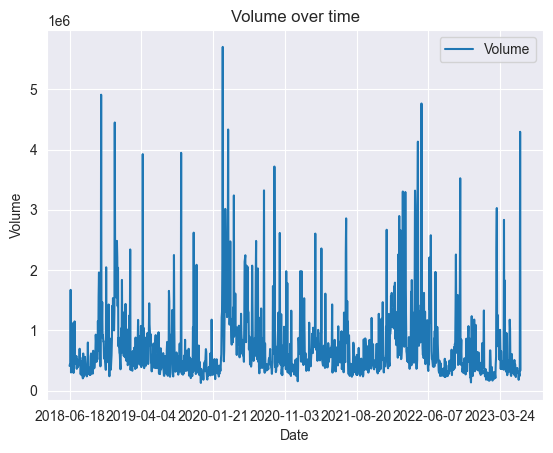

In [73]:
Financials_with_index = Financials.set_index('Date')
Financials['Date'] = pd.to_datetime(Financials['Date'], format='%Y/%m/%d')
Financials_with_index['High'].plot()
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Volume over time')
plt.legend()
plt.show()

In [104]:
Healthcare_with_index = Healthcare.set_index('Date')
Healthcare['Date'] = pd.to_datetime(Healthcare['Date'], format='%m/%d/%Y')
Healthcare_with_index['High'].plot()
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Volume over time')
plt.legend()
plt.show()

ValueError: time data 'Jun 16, 2023' does not match format '%m/%d/%Y' (match)

In [ ]:
stats.ttest_rel(Healthcare['High'], Healthcare['Close'])

In [ ]:
Healthcare['High'].corr(Healthcare['Close'])

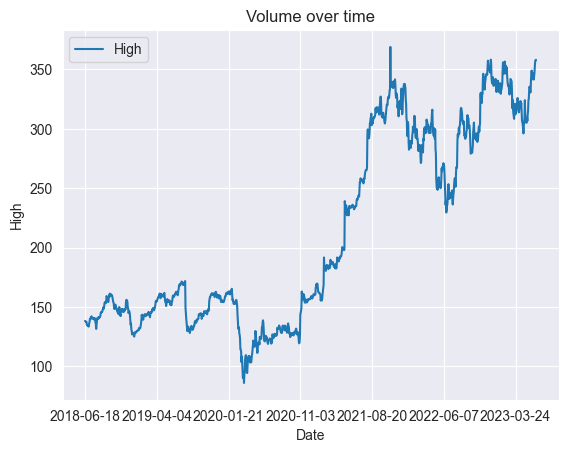

In [79]:
IT_with_index = IT.set_index('Date')
IT['Date'] = pd.to_datetime(IT['Date'], format='%Y/%m/%d')
IT_with_index['High'].plot()
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Volume over time')
plt.legend()
plt.show()

In [80]:
stats.ttest_rel(IT['High'], IT['Close'])

TtestResult(statistic=30.627429409989567, pvalue=2.355350286451202e-154, df=1257)

In [81]:
IT['High'].corr(IT['Close'])

0.999453759614644

In [82]:
CD1_with_index = CD1.set_index('Date1')
CD1['Date1'] = pd.to_datetime(CD1['Date'], format='%Y/%m/%d')
CD1_with_index['High'].plot()
plt.xlabel('Date1')
plt.ylabel('High')
plt.title('Volume over time')
plt.legend()
plt.show()

ValueError: time data "Jun 16, 2023" at position 0 doesn't match format specified